In [6]:
from typing import Dict, TypedDict
from langgraph.graph import StateGraph # framework that helps you design and manage the flow of task in you application using a graph


In [7]:
# We now create an AgentState - shared data structure that keeps track of information as your application runs.

class AgentState(TypedDict): # State schema
    message : str

def greeting_node(state: AgentState) -> AgentState:
    """Simple node that adds a greeting message to the state"""

    state['message'] = 'Hey ' + state['message']

    return state 

In [8]:
graph = StateGraph(AgentState) # construct a graph for states.

graph.add_node("thisIsJustAGreet", greeting_node)
graph.set_entry_point("thisIsJustAGreet")
graph.set_finish_point("thisIsJustAGreet")

app = graph.compile() # remember to compile graph after construction.


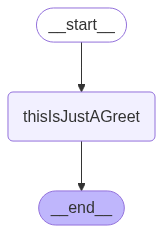

In [9]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [10]:
result = app.invoke({"message": "Bob"})

In [11]:
result["message"]

'Hey Bob'